In [1]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# 1. Preprocesar Documentos

In [2]:
import pandas as pd
import spacy
import json

# Cargar el modelo de spaCy (usa el modelo adecuado para el idioma de los textos (español == es_core_news_md)
nlp = spacy.load('en_core_web_md')  #                                            (inglés == en_core_web_md)

# Configuración de stopwords y POS válidos
valid_POS = {'VERB', 'NOUN', 'ADJ', 'PROPN'}
stopwords = nlp.Defaults.stop_words

# Función de preprocesamiento
def preprocess_text(text):
    """
    Preprocesa un texto para prepararlo para técnicas como BoW o TF-IDF.
    - Filtra stopwords
    - Lematiza palabras
    - Retiene solo palabras alfabéticas y ciertas POS

    Args:
        text (str): Texto a procesar.

    Returns:
        str: Texto procesado.
    """
    try:
        # Procesar con spaCy (Tokenizar)
        doc = nlp(text)

        # Filtrar y lematizar
        lemmatized = [
            token.lemma_.lower() for token in doc
            if token.is_alpha and token.pos_ in valid_POS # Filtrar POS
            and token.text.lower() not in stopwords # Elimina StopWords
        ]
        return " ".join(lemmatized)
    except Exception as e:
        print(f"Error procesando texto: {e}")
        return ""

# Función para aplicar a todas las filas de un DataFrame
def preprocess_dataframe(df, text_columns):
    """
    Aplica el preprocesamiento a las columnas de texto seleccionadas en un DataFrame.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        text_columns (list): Lista de nombres de columnas a combinar y procesar.

    Returns:
        pd.DataFrame: DataFrame con una nueva columna 'processed_text'.
    """
    try:
        # Combinar columnas de texto en una sola
        df['combined_text'] = df[text_columns].fillna('').apply(lambda row: ' '.join(row), axis=1)

        # Aplicar el preprocesamiento
        df['processed_text'] = df['combined_text'].apply(preprocess_text)
        return df
    except Exception as e:
        print(f"Error procesando DataFrame: {e}")
        return df

def save_processed_text_to_file(df, column_name, file_name):
    """
    Guarda los textos preprocesados de un DataFrame en un archivo .txt.

    Args:
        df (pd.DataFrame): DataFrame que contiene la columna con textos preprocesados.
        column_name (str): Nombre de la columna que contiene los textos preprocesados.
        file_name (str): Nombre del archivo donde guardar los textos.
    """
    try:
        # Abrir el archivo en modo escritura
        with open(file_name, 'w', encoding='utf-8') as f:
            # Escribir cada texto en una línea separada
            for text in df[column_name]:
                f.write(text + '\n')
        print(f"Textos guardados en el archivo: {file_name}")
    except Exception as e:
        print(f"Error al guardar en archivo: {e}")



## 1.1 Cargar y Preprocesar todos los datos del dataset (Cambiar rutas y archivos para los datos)

In [4]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo en tu Google Drive
file_path = '/content/drive/MyDrive/MÁSTER/NLP/output.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

# Ver las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())
text_columns = ['title', 'abstract']

# Aplicar preprocesamiento a estas columnas
preprocessed_df = preprocess_dataframe(df, text_columns=text_columns)
save_processed_text_to_file(preprocessed_df, column_name='processed_text', file_name='processed_texts.txt')

# Mostrar las primeras filas después del preprocesamiento
print("Primeras filas después del preprocesamiento:")
print(preprocessed_df[['title', 'processed_text']])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del dataset:
                                               title  \
0  Calculation of prompt diphoton production cros...   
1           Sparsity-certifying Graph Decompositions   
2  The evolution of the Earth-Moon system based o...   
3  A determinant of Stirling cycle numbers counts...   
4  From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...   

                                            abstract       categories  \
0    A fully differential calculation in perturba...           hep-ph   
1    We describe a new algorithm, the $(k,\ell)$-...    math.CO cs.CG   
2    The evolution of Earth-Moon system is descri...   physics.gen-ph   
3    We show that a determinant of Stirling cycle...          math.CO   
4    In this paper we show how to compute the $\L...  math.CA math.FA   

         id  
0  704.0001  
1  704.0002  
2  704.0003  
3  704.0004

# 2. Crear un Corpus

In [5]:
mycorpus = open('processed_texts.txt').readlines()
mycorpus = [el.strip().split() for el in mycorpus]

print(('Number of documents in corpus: '+str(len(mycorpus))))
print(('============= First document in corpus ============='))
print(mycorpus[0])
print(('============= Corresponding Python string ============='))
print(' '.join(mycorpus[0]))

Number of documents in corpus: 10000
============= First document in corpus =============
['calculation', 'prompt', 'diphoton', 'production', 'cross', 'section', 'tevatron', 'lhc', 'energie', 'differential', 'calculation', 'perturbative', 'quantum', 'chromodynamic', 'present', 'production', 'massive', 'photon', 'pair', 'hadron', 'collider', 'lead', 'order', 'perturbative', 'contribution', 'quark', 'antiquark', 'gluon', 'gluon', 'subprocesse', 'include', 'order', 'resummation', 'initial', 'state', 'gluon', 'radiation', 'valid', 'lead', 'logarithmic', 'accuracy', 'region', 'phase', 'space', 'specify', 'calculation', 'reliable', 'good', 'agreement', 'demonstrate', 'datum', 'fermilab', 'tevatron', 'prediction', 'detailed', 'test', 'cdf', 'datum', 'prediction', 'show', 'distribution', 'diphoton', 'pair', 'produce', 'energy', 'large', 'hadron', 'collider', 'lhc', 'distribution', 'diphoton', 'pair', 'decay', 'higgs', 'boson', 'contrast', 'produce', 'qcd', 'process', 'lhc', 'show', 'enhance', 

# 3. Detectar N-Grams (Opcional, si queremos hacerlo debemos ajustar los thresholds para detectar buenos N-Grams)

In [ ]:
from gensim.models.phrases import Phrases

phrase_model = Phrases(mycorpus, min_count=2, threshold=20)
mycorpus = [el for el in phrase_model[mycorpus]] #We populate mycorpus again
print(('============= First document after N-gram replacement ============='))
print(mycorpus[0])

# 4. Creamos un Diccionario

In [9]:
from gensim.corpora import Dictionary

no_below = 4 #Minimum number of documents to keep a term in the dictionary
no_above = .60 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

# Create dictionary of tokens
D = Dictionary(mycorpus)
D.filter_extremes(no_below=no_below,no_above=no_above)

n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])
print('Palabras más comunes:',D.most_common(20))

The dictionary contains 7452 terms
First terms in the dictionary:
0 : accuracy
1 : agreement
2 : antiquark
3 : boson
4 : calculation
5 : cdf
6 : chromodynamic
7 : collider
8 : contrast
9 : contribution
Palabras más comunes: [('model', 5847), ('field', 4180), ('result', 4137), ('system', 3641), ('study', 3354), ('state', 3332), ('energy', 3239), ('find', 3033), ('quantum', 2899), ('theory', 2884), ('present', 2681), ('function', 2679), ('time', 2634), ('high', 2626), ('mass', 2378), ('star', 2366), ('large', 2268), ('space', 2202), ('equation', 2124), ('non', 2119)]


# 5. Hacemos BoW

In [13]:
mycorpus_bow = [D.doc2bow(doc) for doc in mycorpus]

n_project = 1000
print(('============= Project abstract (lemmas) ============='))
print(' '.join(mycorpus[n_project]))

print(('============= Sparse vector representation ============='))
print(mycorpus_bow[n_project])

print(('============= Word counts for the project ============='))
print(list(map(lambda x: (D[x[0]], x[1]), mycorpus_bow[n_project])))

print(D.token2id)
print(f"Tamaño del diccionario: {len(D)}")
print(f"Total de documentos en el corpus: {len(mycorpus_bow)}")


============= Project abstract (lemmas) =============
tautological relation hodge field theory propose hodge field theory construction capture algebraic property reduction zwiebach invariant gromov witten invariant generalize barannikov kontsevich construction case high genera correlator gravitational descendant prove main theorem state define hodge field theory correlator satisfy tautological relation perspective statement barannikov kontsevich construction provide solution wdvv equation look simple particular case theorem generalize particular case low genera tautological relation prove early work replace old technical proof novel conceptual proof
============= Sparse vector representation =============
[(59, 1), (79, 2), (86, 2), (89, 2), (94, 1), (99, 3), (104, 1), (123, 3), (140, 1), (259, 3), (265, 1), (274, 1), (282, 1), (286, 1), (302, 1), (358, 1), (394, 3), (397, 1), (407, 1), (443, 1), (449, 1), (451, 2), (673, 1), (684, 1), (760, 1), (840, 2), (956, 3), (1033, 1), (1436, 1)

# 6. Crear LDA

In [17]:
from gensim.models import CoherenceModel
# Medimos la coherencia para encontrar el mejor valor de numtopics
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=20, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append((num_topics, coherence_model.get_coherence()))
    return coherence_values

# Ejecutar
coherence_values = compute_coherence_values(D, mycorpus_bow, mycorpus, start=26, limit=36, step=1)

# Imprimir resultados
for num_topics, coherence in coherence_values:
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence}")

Num Topics: 26, Coherence Score: 0.49085985429534584
Num Topics: 27, Coherence Score: 0.4549286391303595
Num Topics: 28, Coherence Score: 0.4961319058922403
Num Topics: 29, Coherence Score: 0.46320175859267954
Num Topics: 30, Coherence Score: 0.46037394508919155
Num Topics: 31, Coherence Score: 0.4441581018173895
Num Topics: 32, Coherence Score: 0.45271009417393493
Num Topics: 33, Coherence Score: 0.45137770321427767
Num Topics: 34, Coherence Score: 0.46560590795568046
Num Topics: 35, Coherence Score: 0.45619657475240266


In [19]:
from gensim.models.ldamodel import LdaModel
num_topics = 22
# 0.51 coherence
ldag = LdaModel(corpus=mycorpus_bow, id2word=D, num_topics=num_topics, passes=10, random_state=42)

# 7. Añadir la distribución de probabilidad del LDA al dataset original

In [56]:
all_doc_topics = [
    [(f"{topic_id}", prob) for topic_id, prob in ldag.get_document_topics(bow, minimum_probability=0.001)]
    for bow in mycorpus_bow
]

new_df = df.copy()
new_df['topic_distribution'] = all_doc_topics
new_df.head(10)

,title,abstract,categories,id,combined_text,processed_text,topic_distribution
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,704.0001,Calculation of prompt diphoton production cros...,calculation prompt diphoton production cross s...,"[(4, 0.026134662), (7, 0.05074103), (8, 0.9128..."
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,704.0002,Sparsity-certifying Graph Decompositions We ...,sparsity certify graph decompositions describe...,"[(0, 0.04600075), (2, 0.11523809), (5, 0.56039..."
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,704.0003,The evolution of the Earth-Moon system based o...,evolution earth moon system base dark matter f...,"[(1, 0.057515644), (2, 0.013735894), (3, 0.059..."
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,704.0004,A determinant of Stirling cycle numbers counts...,determinant stirling cycle number count unlabe...,"[(0, 0.0015154853), (1, 0.0015154853), (2, 0.0..."
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,dyadic paper compute norm dyadic grid result c...,"[(0, 0.002843138), (1, 0.002843138), (2, 0.525..."
5,Bosonic characters of atomic Cooper pairs acro...,We study the two-particle wave function of p...,cond-mat.mes-hall,704.0006,Bosonic characters of atomic Cooper pairs acro...,bosonic character atomic cooper pair resonance...,"[(1, 0.27924708), (2, 0.10995397), (5, 0.05407..."
6,Polymer Quantum Mechanics and its Continuum Limit,A rather non-standard quantum representation...,gr-qc,704.0007,Polymer Quantum Mechanics and its Continuum Li...,polymer quantum mechanics continuum limit non ...,"[(0, 0.09083851), (2, 0.08075733), (3, 0.13545..."
7,Numerical solution of shock and ramp compressi...,A general formulation was developed to repre...,cond-mat.mtrl-sci,704.0008,Numerical solution of shock and ramp compressi...,numerical solution shock ramp compression gene...,"[(3, 0.114917584), (7, 0.063424945), (9, 0.269..."
8,"The Spitzer c2d Survey of Large, Nearby, Inste...",We discuss the results from the combined IRA...,astro-ph,704.0009,"The Spitzer c2d Survey of Large, Nearby, Inste...",spitzer survey large nearby insterstellar clou...,"[(5, 0.022015579), (8, 0.023198476), (11, 0.06..."
9,"Partial cubes: structures, characterizations, ...",Partial cubes are isometric subgraphs of hyp...,math.CO,704.0010,"Partial cubes: structures, characterizations, ...",partial cube structure characterization constr...,"[(2, 0.35003582), (4, 0.030324392), (6, 0.0684..."


In [51]:
# Mostrar las palabras más relevantes de cada tópico
num_words = 10  # Número de palabras por tópico

topics = ldag.show_topics(num_topics=num_topics, num_words=num_words, formatted=True)
for topic_id, topic_words in topics:
    print(f"Tópico {topic_id}: {topic_words}")

Tópico 0: 0.025*"model" + 0.020*"gauge" + 0.019*"symmetry" + 0.017*"quark" + 0.016*"loop" + 0.015*"theory" + 0.012*"mass" + 0.011*"chiral" + 0.010*"coupling" + 0.009*"qcd"
Tópico 1: 0.038*"spin" + 0.022*"electron" + 0.017*"state" + 0.013*"quantum" + 0.012*"effect" + 0.012*"charge" + 0.011*"temperature" + 0.011*"energy" + 0.010*"density" + 0.009*"interaction"
Tópico 2: 0.025*"space" + 0.022*"algebra" + 0.022*"group" + 0.015*"structure" + 0.012*"invariant" + 0.012*"representation" + 0.011*"product" + 0.010*"lie" + 0.008*"manifold" + 0.008*"ring"
Tópico 3: 0.023*"system" + 0.021*"time" + 0.020*"equation" + 0.017*"dynamic" + 0.015*"process" + 0.014*"distribution" + 0.011*"equilibrium" + 0.011*"model" + 0.009*"diffusion" + 0.009*"function"
Tópico 4: 0.097*"quantum" + 0.085*"state" + 0.026*"system" + 0.021*"entanglement" + 0.017*"qubit" + 0.013*"photon" + 0.012*"classical" + 0.012*"information" + 0.011*"measurement" + 0.008*"single"
Tópico 5: 0.022*"network" + 0.020*"model" + 0.012*"random" 

# 8. Sacar Matriz de embeddings de los documentos a partir de las distribuciones calculadas

In [83]:
corpus_size = len(new_df)
print(f"Original dataset contains {corpus_size} documents")
new_df.head()

Original dataset contains 10000 documents


,title,abstract,categories,id,combined_text,processed_text,topic_distribution
0,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,704.0001,Calculation of prompt diphoton production cros...,calculation prompt diphoton production cross s...,"[(4, 0.026134662), (7, 0.05074103), (8, 0.9128..."
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,704.0002,Sparsity-certifying Graph Decompositions We ...,sparsity certify graph decompositions describe...,"[(0, 0.04600075), (2, 0.11523809), (5, 0.56039..."
2,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,704.0003,The evolution of the Earth-Moon system based o...,evolution earth moon system base dark matter f...,"[(1, 0.057515644), (2, 0.013735894), (3, 0.059..."
3,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,704.0004,A determinant of Stirling cycle numbers counts...,determinant stirling cycle number count unlabe...,"[(0, 0.0015154853), (1, 0.0015154853), (2, 0.0..."
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,dyadic paper compute norm dyadic grid result c...,"[(0, 0.002843138), (1, 0.002843138), (2, 0.525..."


In [84]:
from gensim.matutils import corpus2csc

# Ensure topic IDs are integers
new_df['topic_distribution'] = new_df['topic_distribution'].apply(
    lambda lst: [(int(topic), prob) for topic, prob in lst]
)

# Use the topic distributions directly
X = new_df['topic_distribution'].values.tolist()

# Convert to sparse matrix
X = corpus2csc(X).T

# Check dimensions and nonzero values
n_topics = X.shape[1]
n_docs = X.shape[0]
print(f"Number of topics: {n_topics}")
print(f"X: sparse matrix with {X.nnz} nonzero values out of {n_docs * n_topics}")
print(X.shape)


Number of topics: 22
X: sparse matrix with 103708 nonzero values out of 220000
(10000, 22)


In [85]:
n = 0
print(f"Document: ")
print(f"Title:        {new_df.iloc[n].title}")
print(f"Embedding:")
print(X[n, :])

Document: 
Title:        Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies
Embedding:
  (0, 4)	0.026134662330150604
  (0, 7)	0.050741031765937805
  (0, 8)	0.9128400683403015


In [86]:
import numpy as np
import scipy.sparse as scsp

print(f"{(1 - X.nnz / n_docs / n_topics) * 100:.2f} % ")
print(f"Average row sum: {np.mean(X.sum(axis=1).T)}")

# Normalization:
X = scsp.csr_matrix(X / np.sum(X, axis=1))
print(f"Average row sum after normalization: {np.mean(X.sum(axis=1).T)}")

52.86 % 
Average row sum: 0.9926624271500972
Average row sum after normalization: 1.0


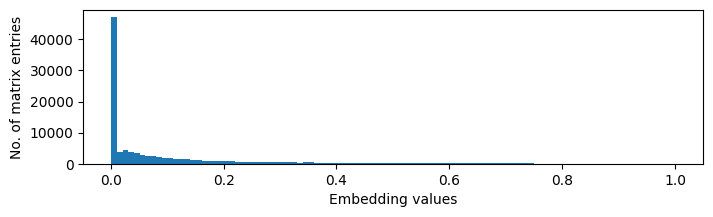

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
plt.hist(X.data, bins=100)
plt.xlabel('Embedding values')
plt.ylabel('No. of matrix entries')
plt.show()

# 9. BC similarity

In [88]:
i = 0
xi = X[i, :].T
# You can do the computation in a single line, multiplying sqrt(X) times sqrt(xi).
# BC = <FILL IN>
BC = (np.sqrt(X) @ np.sqrt(xi))

# This may be useful to convert your solution into a 1D array.
BC = BC.toarray().T[0]

In [89]:
# imin = <FILL IN>
imin = np.argmin(BC)

BC_i = BC
BC_i[i] = 0

# imax = <FILL IN>
imax = np.argmax(BC_i)

In [90]:
print("Test document: ")
print(f"-- Position: {i}")
print(f"-- Title:        {new_df.iloc[i].title}\n")
# print(f"-- Clean lemmas: {new_df.iloc[i].clean_lemmas}")

print("Most similar document: ")
print(f"-- Position: {imax}")
print(f"-- Title:        {new_df.iloc[imax].title}")
#print(f"-- Clean lemmas: {new_df.iloc[imax].clean_lemmas}")
print(f"--BC: {BC_i[imax]}\n")

print("Least similar document: ")
print(f"-- Position: {imin}")
print(f"-- Title:        {new_df.iloc[imin].title}")
print(f"-- BC: {BC_i[imin]}")
#print(f"-- Clean lemmas: {new_df.iloc[imin].clean_lemmas}")

Test document: 
-- Position: 0
-- Title:        Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies

Most similar document: 
-- Position: 436
-- Title:        Measurement of B(D_S^+ --> ell^+ nu) and the Decay Constant f_D_{S^+}
--BC: 0.9855243367733013

Least similar document: 
-- Position: 1
-- Title:        Sparsity-certifying Graph Decompositions
-- BC: 0.0


# 10. Similarity Matrix

In [91]:
# Compute BC similarity
# <SOL>
sqrtX = np.sqrt(X)
S = sqrtX.dot(sqrtX.T)

print('Size of S', S.shape)
print('Number of non-zero components in S:', S.nnz)
print(f'Proportion of non-zero components: {S.nnz / n_docs**2 * 100} % ')
# </SOL>

Size of S (10000, 10000)
Number of non-zero components in S: 91976734
Proportion of non-zero components: 91.97673400000001 % 


In [92]:
S = scsp.triu(S, k=1)

# print('Number of non-zero components in S:', <FILL IN>
print('Number of non-zero components in S:', S.nnz)

Number of non-zero components in S: 45983367


# 11. Construir el grafo

In [93]:
# n_nodes = <FILL IN>
n_nodes = n_docs
# n_edges = <FILL IN>
n_edges = S.nnz
# n_edges_per_node = <FILL IN>
n_edges_per_node = n_edges / n_nodes

print(f"Number of nodes: {n_nodes}")
print(f"Number of edges: {n_edges}")
print(f"Number of edges per node: {n_edges_per_node}")


Number of nodes: 10000
Number of edges: 45983367
Number of edges per node: 4598.3367


In [94]:
# Set average number of edges per node
n_edges_per_node = 10
sample_factor = 1
# Compute threshold to get the target number of edges
# <SOL>
n_edges = n_docs * n_edges_per_node
n_edges = min(n_edges, S.nnz)
thr = -np.sort(-S.data)[n_edges]
# </SOL>

# Apply the threshold to similarity matrix
# <SOL>
S.data = np.where(S.data <= thr, 0, S.data)
S.eliminate_zeros()
n_edges = len(S.data)
# </SOL>

print(f"Threshold: {thr}")
print(f"Number of edges: {n_edges}")
print('Estimated number of links in full corpus:', len(S.data)/2/sample_factor**2)

Threshold: 0.9027404903961875
Number of edges: 100000
Estimated number of links in full corpus: 50000.0


In [96]:
import networkx as nx
import networkx.algorithms.community as nx_comm
try:
    from google.colab import drive
    in_colab = True
except:
    in_colab = False

# WARNING: In Google Colab, you might need to use from_scipy_sparse_matrix
if in_colab:
    G = nx.from_scipy_sparse_array(S)
else:
    G = nx.from_scipy_sparse_array(S)

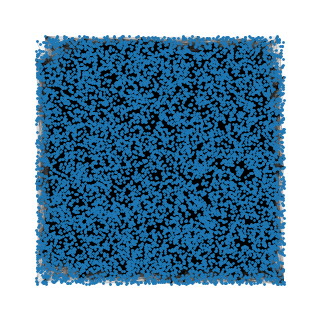

In [97]:
# ########################
# Testing a random  layout

positions = nx.drawing.layout.random_layout(G)
plt.figure(figsize=(3,3))
nx.draw(G, positions, node_size=1, width=0.02)

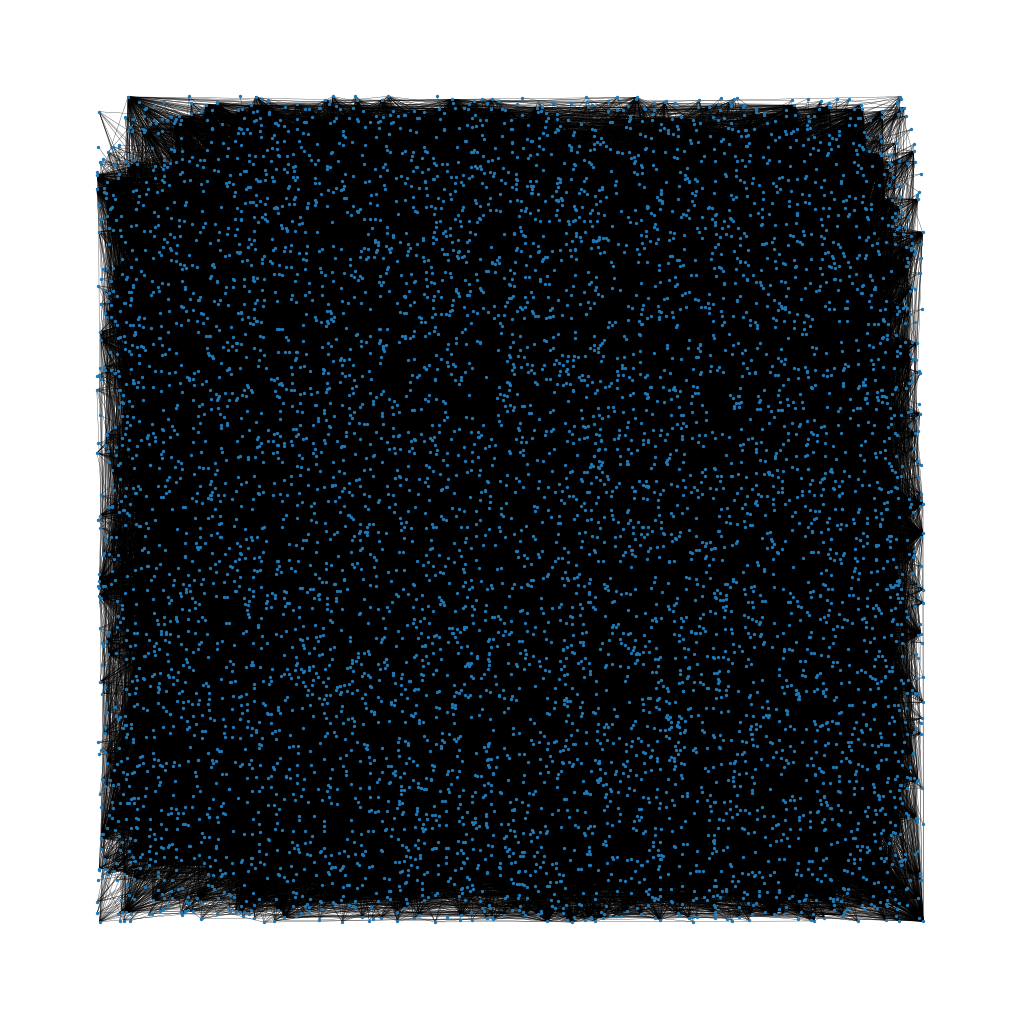

In [99]:
# <SOL>
# Nodes of the LCC
nodes_lcc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(nodes_lcc).copy()

plt.figure(figsize=(10,10))
nx.draw(G_lcc, positions, node_size=2, width=0.2)
# </SOL>

In [102]:
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.8/434.8 kB 7.9 MB/s eta 0:00:00


100%|██████████| 200/200 [01:24<00:00,  2.38it/s]


BarnesHut Approximation  took  28.32  seconds
Repulsion forces  took  52.72  seconds
Gravitational forces  took  0.15  seconds
Attraction forces  took  0.66  seconds
AdjustSpeedAndApplyForces step  took  0.82  seconds


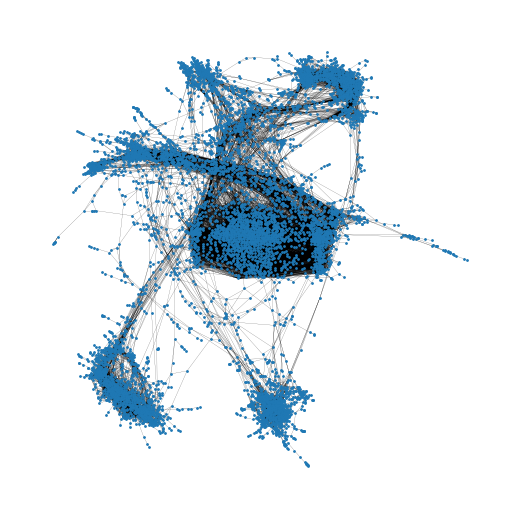

In [103]:
from fa2_modified import ForceAtlas2

# Compute positions using layout algorithm
gravity = 50

# Create layout object
# <SOL>
layout = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=False,  # Dissuade hubs
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=1.0,
    # Performance
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED
    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=gravity,
    # Log
    verbose=True)
# </SOL>

# This is a hack to avoid an execution error depending on the version of networkx. You can
# simply ignore but not remove it
if not hasattr(nx, "to_scipy_sparse_matrix"):
    def to_scipy_sparse_matrix(G, dtype='f', format='lil'):
        return nx.to_scipy_sparse_array(G_lcc)
    nx.to_scipy_sparse_matrix = to_scipy_sparse_matrix

# Compute node positions using forceatlas2_networkx_layout method.
# positions = <FILL IN>
positions = layout.forceatlas2_networkx_layout(G_lcc, pos=None, iterations=200)

# Draw graph
# <SOL>
plt.figure(figsize=(5,5))
nx.draw(G_lcc, positions, node_size=1, width=0.1)
# </SOL>


# EXTRA. Encontrar los documentos más relevantes de un tópic

In [20]:
def most_relevant_documents(ldag, topicid, corpus_bow, ndocs=10):
    """This function returns the most relevant documents in corpus_bow

    : ldag: The trained topic model object provided by gensim
    : topicid: The topic for which we want to find the most relevant documents
    : corpus_bow: The BoW representation of documents in Gensim format
    : ndocs: Number of most relevant documents to return

    : Returns: A list with the identifiers of the most relevant documents
    """
    print('Computing most relevant documents for Topic', topicid)
    print('Topic composition is:')
    print(ldag.show_topic(topicid))

    # Compute relevance of each document for the given topic
    doc_topic_probs = [
        (doc_id, ldag.get_document_topics(bow, minimum_probability=0)[topicid][1])
        for doc_id, bow in enumerate(corpus_bow)
    ]

    # Sort documents by their probability for the topic in descending order
    sorted_docs = sorted(doc_topic_probs, key=lambda x: x[1], reverse=True)

    # Extract the identifiers of the most relevant documents
    most_relevant_doc_ids = [doc_id for doc_id, _ in sorted_docs[:ndocs]]

    return most_relevant_doc_ids

# To test the function we will find the most relevant projects for one of the topics
project_id = most_relevant_documents(ldag, 8, mycorpus_bow, ndocs=3)

# Print titles of selected projects
for idproject in project_id:
    print('\n', ' '.join(mycorpus[idproject]))

Computing most relevant documents for Topic 8
Topic composition is:
[('energy', 0.02078885), ('decay', 0.01685227), ('neutrino', 0.014400689), ('datum', 0.013718237), ('production', 0.013240603), ('experiment', 0.010467879), ('measurement', 0.010462146), ('particle', 0.010177522), ('cross', 0.00971649), ('result', 0.009659581)]

 search higgs boson produce association z boson ppbar collision describe search standard model higgs boson mass gev gev datum correspond integrate luminosity collect detector fermilab tevatron ppbar collider center mass energy higgs boson require produce association z boson z boson require decay electron muon higgs boson decay bbbar pair datum describe expected background lead confidence level cross section upper limit range

 w mass width measurement tevatron present measurement w boson mass width cdf run ii datum measurement perform electron muon decay channel rely fit w transverse mass distribution measure mev mev represent world single precise measurement d